# Sample Characteristic Figures

1. Summary of demographic data (table)
2. Age distributions - Site - TD, patient
3. Age distributions - Diagnosis - Male, female

## 1. Summary of demograhpic data

['HC', 'ADHD', 'ASD', 'BIPOL', 'MDD', 'OCD', 'SCZ']


/project_cephfs/3022017.02/projects/ashseg/virtual_envs/pcn_wm_blr_virtualenv/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


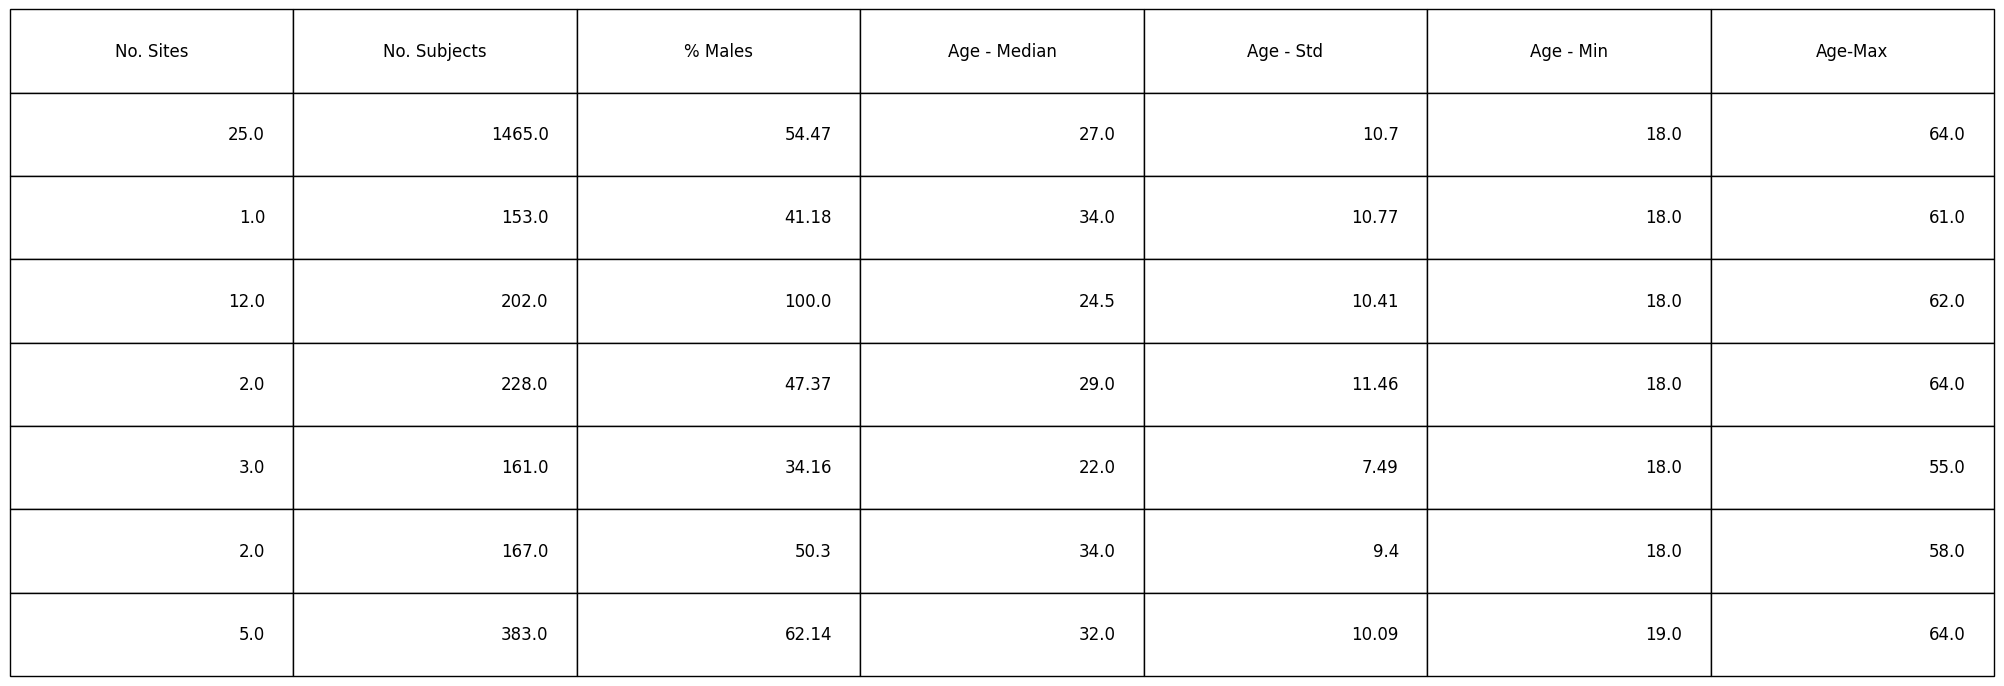

In [19]:
 import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pltfunc_path = '/project_cephfs/3022017.02/projects/ashseg/code/functions/'
sys.path.append(pltfunc_path)
from helpful_functions import unique

wdir = '/project_cephfs/3022017.02/projects/ashseg/models/bc_transform/ids/'
os.chdir(wdir)

metadata_train = pd.read_table((wdir+'metadata_train.csv'), delimiter=',')
metadata_test = pd.read_table((wdir+'metadata_test.csv'), delimiter=',')
metadata = pd.concat([metadata_train,metadata_test])

groups = unique(metadata['diagnosis_string'])
table_data = np.zeros((len(groups),7))

groups = ['HC','ADHD','ASD','BIPOL','MDD','OCD','SCZ']
print(groups)
for i,group in enumerate(groups):

    idx = np.where(metadata['diagnosis_string']==group)[0]
    metadata_tmp = metadata.iloc[idx]
    idx_male = np.where(metadata_tmp['sex_string']=='male')[0]
    
    site_strings = unique(metadata['site_string'].iloc[idx])
    table_data[i,0] = len(site_strings)
    table_data[i,1] = len(metadata_tmp)              
    table_data[i,2] = round(len(idx_male) / len(metadata_tmp) * 100 ,2)            
    table_data[i,3] = round(np.median(metadata_tmp['age']) ,2)            
    table_data[i,4] = round(np.std(metadata_tmp['age']) ,2)            
    table_data[i,5] = np.min(metadata_tmp['age'])             
    table_data[i,6] = np.max(metadata_tmp['age'])               
        
df = pd.DataFrame(table_data,columns =['No. Sites','No. Subjects','% Males','Age - Median','Age - Std','Age - Min','Age-Max'])
 
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)

table.set_fontsize(12)
table.scale(4, 5)
#display table
fig.tight_layout()
plt.show()

## 2. Age distributions - Site - HC, patient

/project_cephfs/3022017.02/projects/ashseg/virtual_envs/pcn_wm_blr_virtualenv/lib/python3.7/site-packages/ipykernel_launcher.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


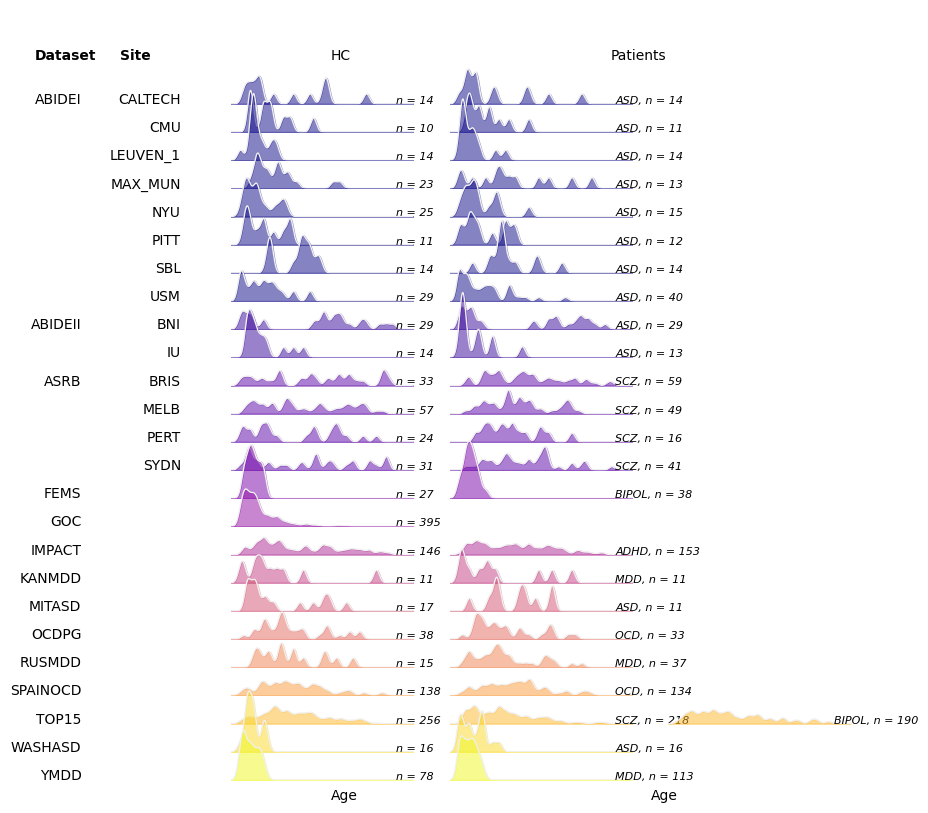

In [40]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import matplotlib.colors as colors
import matplotlib.cm as cm

pltfunc_path = '/project_cephfs/3022017.02/projects/ashseg/code/functions/'
sys.path.append(pltfunc_path)
from helpful_functions import unique

wdir = '/project_cephfs/3022017.02/projects/ashseg/models/bc_transform/ids/'
os.chdir(wdir)

metadata_train = pd.read_table((wdir+'metadata_train.csv'), delimiter=',')
metadata_test = pd.read_table((wdir+'metadata_test.csv'), delimiter=',')
metadata = pd.concat([metadata_train,metadata_test])

groups = unique(metadata['diagnosis_string'])
sites = unique(metadata['site_string'])
datasets = unique(metadata['dataset'])
datasets = sorted(datasets)

cm_subsection = np.linspace(0, 1, len(datasets)) 
colors = [ cm.plasma(x) for x in cm_subsection ]
gs = grid_spec.GridSpec(len(sites),3)


fig = plt.figure(figsize=(8,10))

i = 0

ax_objs = []

for c,dataset in enumerate(datasets):
    sites_dataset = unique(metadata[metadata.dataset==dataset].site_string)
    for m, site in enumerate(sites_dataset):
        grp_labels = unique(metadata[metadata.dataset==dataset].diagnosis_string)
        for g, grp_label in enumerate(grp_labels):
            if g ==0:
                x = np.array(metadata[(metadata.dataset==dataset)&(metadata.site_string == site) & (metadata.diagnosis_string == 'HC')].age)
            else:
                x = np.array(metadata[(metadata.dataset==dataset)&(metadata.site_string == site) & (metadata.diagnosis_string == grp_label)].age)
             
            if x.size:
                x_d = np.linspace(15,70, 1000)

                kde = KernelDensity(bandwidth=0.9, kernel='gaussian')
                kde.fit(x[:, None])

                logprob = kde.score_samples(x_d[:, None])
                #print(x_d)
                # creating new axes object
                ax_objs.append(fig.add_subplot(gs[i:i+1, g]))

                # plotting the distribution
                ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
                ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=.5,color=colors[c])

                #plot = (metadata[metadata.site == site]
                #    .age.plot.kde(ax=ax_objs[-1],color="#f0f0f0", lw=0.5)
                 #  )

                # setting uniform x and y lims
                ax_objs[-1].set_xlim(15,70)
                ax_objs[-1].set_ylim(0,.3)

                # make background transparent
                rect = ax_objs[-1].patch
                rect.set_alpha(0)

                # remove borders, axis ticks, and labels
                ax_objs[-1].set_yticklabels([])

                ax_objs[-1].set_xticklabels([])

                spines = ["top","right","left","bottom"]
                for s in spines:
                    ax_objs[-1].spines[s].set_visible(False)

                #if grp_label ==0:
                #    adj_site = site.replace(" ","\n")
                #    ax_objs[-1].text(-0.02,0,adj_site,fontname="calibri",fontsize=10,ha="right")
                ax_objs[-1].set_xticks([])
                ax_objs[-1].set_yticks([])
                
                if g ==0:
                    numSubs = len(metadata[(metadata.dataset==dataset)&(metadata.site_string == site) & (metadata.diagnosis_string == 'HC')])
                    text_string = "n = " + str(numSubs)
                else: 
                    numSubs = len(metadata[(metadata.dataset==dataset)&(metadata.site_string == site) & (metadata.diagnosis_string == grp_label)])
                    text_string = grp_label + ", n = " + str(numSubs)

                ax_objs[-1].text(65, 0.01, text_string, style='italic', ha="left", va="center",fontsize=8)
                
                if (len(sites_dataset) > 1) & (m == 0) & (g==0):    
                    adj_dataset = dataset.replace(" ","\n")
                    ax_objs[-1].text(-30,0,adj_dataset,fontname="calibri",fontsize=10,ha="right")
                    adj_site = site.replace(" ","\n")
                    ax_objs[-1].text(-0.02,0,adj_site,fontname="calibri",fontsize=10,ha="right")
                elif (len(sites_dataset) > 1) & (g==0):    
                    adj_site = site.replace(" ","\n")
                    ax_objs[-1].text(-0.02,0,adj_site,fontname="calibri",fontsize=10,ha="right")
                elif (len(sites_dataset) == 1) & (g==0): 
                    adj_site = dataset.replace(" ","\n")
                    ax_objs[-1].text(-30,0,adj_site,fontname="calibri",fontsize=10,ha="right")
                    
        i += 1

gs.update(hspace=-0.7)
fig.text(-.12,0.83,"Dataset",fontsize=10, weight='bold')
fig.text(-.013,0.83,"Site",fontsize=10, weight='bold')

fig.text(0.25,0.83,"HC",fontsize=10)
fig.text(0.60,0.83,"Patients",fontsize=10)
fig.text(0.25,.09,"Age",fontsize=10)
fig.text(0.65,.09,"Age",fontsize=10)

#fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 ? 24 year-olds",fontsize=20)

plt.axis('off')
plt.tight_layout()

filename = '/project_cephfs/3022017.02/projects/ashseg/models/bc_transform/ageDistribution_ridgePlot_TD_PAT.png'
plt.savefig(filename, bbox_inches = "tight")
plt.show()

## 3. Age distributions - Diagnosis - Male, female

/project_cephfs/3022017.02/projects/ashseg/virtual_envs/pcn_wm_blr_virtualenv/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


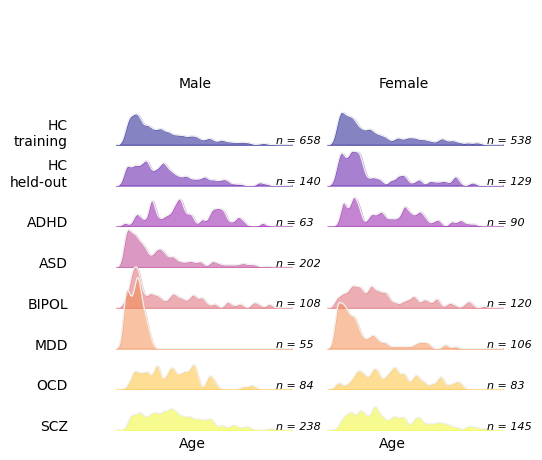

In [23]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import matplotlib.colors as colors
import matplotlib.cm as cmx

pltfunc_path = '/project_cephfs/3022017.02/projects/ashseg/code/functions/'
sys.path.append(pltfunc_path)
from helpful_functions import unique

wdir = '/project_cephfs/3022017.02/projects/ashseg/models/bc_transform/ids/'
os.chdir(wdir)

metadata_train = pd.read_table((wdir+'metadata_train.csv'), delimiter=',')
metadata_train['diagnosis_string'] = 'HC_train'
metadata_test = pd.read_table((wdir+'metadata_test.csv'), delimiter=',')
metadata = pd.concat([metadata_train,metadata_test])

features = ['HC_train','HC', 'ADHD','ASD','BIPOL','MDD','OCD','SCZ']
features_string = ['HC training', 'HC held-out', 'ADHD','ASD','BIPOL','MDD','OCD','SCZ']


cm_subsection = np.linspace(0, 1, len(features)) 
colors = [ cm.plasma(x) for x in cm_subsection ]
gs = grid_spec.GridSpec(len(features)+1,2)


fig = plt.figure(figsize=(5,6))

i = 0

ax_objs = []

for c, group in enumerate(features):
    
    group_string = features_string[c]
        
    for grp_label in range(2):
        if grp_label ==0:
            x = np.array(metadata[(metadata.diagnosis_string==group)&(metadata.sex_string == 'male')].age)
        else:
            x = np.array(metadata[(metadata.diagnosis_string==group)&(metadata.sex_string == 'female')].age)

        if x.size:
            x_d = np.linspace(15,70, 1000)

            kde = KernelDensity(bandwidth=0.9, kernel='gaussian')
            kde.fit(x[:, None])

            logprob = kde.score_samples(x_d[:, None])
            #print(x_d)
            # creating new axes object
            ax_objs.append(fig.add_subplot(gs[i:i+1, grp_label]))

            # plotting the distribution
            ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
            ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=.5,color=colors[c])

            #plot = (metadata[metadata.site == site]
            #    .age.plot.kde(ax=ax_objs[-1],color="#f0f0f0", lw=0.5)
             #  )

            # setting uniform x and y lims
            ax_objs[-1].set_xlim(15,70)
            ax_objs[-1].set_ylim(0,.3)

            # make background transparent
            rect = ax_objs[-1].patch
            rect.set_alpha(0)

            # remove borders, axis ticks, and labels
            ax_objs[-1].set_yticklabels([])

            ax_objs[-1].set_xticklabels([])

            spines = ["top","right","left","bottom"]
            for s in spines:
                ax_objs[-1].spines[s].set_visible(False)

            if grp_label ==0:
                adj_site = group_string.replace(" ","\n")
                ax_objs[-1].text(-0.01,0,adj_site,fontname="calibri",fontsize=10,ha="right")
            ax_objs[-1].set_xticks([])
            ax_objs[-1].set_yticks([])

            if grp_label ==0:
                numSubs = len(metadata[(metadata.diagnosis_string==group)&(metadata.sex_string == 'male')])
            else: 
                numSubs = len(metadata[(metadata.diagnosis_string==group)&(metadata.sex_string == 'female')])
            ax_objs[-1].text(65, 0.01, "n = " + str(numSubs), style='italic', ha="left", va="center",fontsize=8)


    i += 1

gs.update(hspace=-0.7)

fig.text(0.25,0.75,"Male",fontsize=10)
fig.text(0.65,0.75,"Female",fontsize=10)
fig.text(0.25,.15,"Age",fontsize=10)
fig.text(0.65,.15,"Age",fontsize=10)

#fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 ? 24 year-olds",fontsize=20)

plt.axis('off')
plt.tight_layout()

filename = '/project_cephfs/3022017.02/projects/ashseg/models/bc_transform/ageDistribution_ridgePlot_SEX.png'
plt.savefig(filename, bbox_inches = "tight")
plt.show()